In [ ]:
from ipynb.fs.full.functions import import_data
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers, regularizers
import numpy as np
import keras.utils
import matplotlib.pyplot as plt

### Import data

In [2]:
#X train also contains cross validation set. model.fit will split it between training and cross validation
X_train, X_test, y_train, y_test = import_data('Database.csv')
#convert labels to one-hot vectors
y_train_oneHot = keras.utils.to_categorical(y_train, num_classes=3)
y_test_oneHot = keras.utils.to_categorical(y_test, num_classes=3)

### Build model 

In [10]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=24,kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.00)))
model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.00)))
model.add(Dense(25, activation='relu',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.00)))
model.add(Dense(3, activation='softmax'))

### Compile model

In [11]:
optimizer = optimizers.Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train model

In [12]:
#X_train is 0.8 of total data set so cross validation needs to be 0.25 of X_train to be 0.2 of total dataset
history = model.fit(X_train, y_train_oneHot, validation_split=0.25, epochs=1000, batch_size=25, verbose = 1)

Train on 48 samples, validate on 17 samples
Epoch 1/1000
48/48 [==============================] - 0s 7ms/step - loss: 3.5049 - acc: 0.2083 - val_loss: 2.5728 - val_acc: 0.2353
Epoch 2/1000
48/48 [==============================] - 0s 83us/step - loss: 2.3461 - acc: 0.3333 - val_loss: 2.0802 - val_acc: 0.5882
Epoch 3/1000
48/48 [==============================] - 0s 104us/step - loss: 2.0080 - acc: 0.4792 - val_loss: 1.8760 - val_acc: 0.6471
Epoch 4/1000
48/48 [==============================] - 0s 83us/step - loss: 1.9669 - acc: 0.5417 - val_loss: 1.8435 - val_acc: 0.7059
Epoch 5/1000
48/48 [==============================] - 0s 125us/step - loss: 2.0434 - acc: 0.5833 - val_loss: 1.8708 - val_acc: 0.5882
Epoch 6/1000
48/48 [==============================] - 0s 104us/step - loss: 2.0668 - acc: 0.5625 - val_loss: 1.8231 - val_acc: 0.7059
Epoch 7/1000
48/48 [==============================] - 0s 83us/step - loss: 1.9863 - acc: 0.5625 - val_loss: 1.7646 - val_acc: 0.7059
Epoch 8/1000
48/48 [===

48/48 [==============================] - 0s 63us/step - loss: 1.2580 - acc: 0.6667 - val_loss: 1.3562 - val_acc: 0.6471
Epoch 62/1000
48/48 [==============================] - 0s 104us/step - loss: 1.2517 - acc: 0.6667 - val_loss: 1.3595 - val_acc: 0.6471
Epoch 63/1000
48/48 [==============================] - 0s 63us/step - loss: 1.2485 - acc: 0.6875 - val_loss: 1.3615 - val_acc: 0.6471
Epoch 64/1000
48/48 [==============================] - 0s 63us/step - loss: 1.2416 - acc: 0.6875 - val_loss: 1.3657 - val_acc: 0.6471
Epoch 65/1000
48/48 [==============================] - 0s 63us/step - loss: 1.2429 - acc: 0.6667 - val_loss: 1.3554 - val_acc: 0.6471
Epoch 66/1000
48/48 [==============================] - 0s 63us/step - loss: 1.2355 - acc: 0.6667 - val_loss: 1.3586 - val_acc: 0.6471
Epoch 67/1000
48/48 [==============================] - 0s 63us/step - loss: 1.2318 - acc: 0.6667 - val_loss: 1.3483 - val_acc: 0.6471
Epoch 68/1000
48/48 [==============================] - 0s 83us/step - loss:

48/48 [==============================] - 0s 83us/step - loss: 1.0666 - acc: 0.6875 - val_loss: 1.2276 - val_acc: 0.6471
Epoch 123/1000
48/48 [==============================] - 0s 83us/step - loss: 1.0638 - acc: 0.6875 - val_loss: 1.2398 - val_acc: 0.6471
Epoch 124/1000
48/48 [==============================] - 0s 63us/step - loss: 1.0609 - acc: 0.6667 - val_loss: 1.2387 - val_acc: 0.6471
Epoch 125/1000
48/48 [==============================] - 0s 83us/step - loss: 1.0564 - acc: 0.6458 - val_loss: 1.2407 - val_acc: 0.6471
Epoch 126/1000
48/48 [==============================] - 0s 83us/step - loss: 1.0558 - acc: 0.6458 - val_loss: 1.2354 - val_acc: 0.6471
Epoch 127/1000
48/48 [==============================] - 0s 83us/step - loss: 1.0530 - acc: 0.6458 - val_loss: 1.2277 - val_acc: 0.6471
Epoch 128/1000
48/48 [==============================] - 0s 63us/step - loss: 1.0526 - acc: 0.6667 - val_loss: 1.2232 - val_acc: 0.6471
Epoch 129/1000
48/48 [==============================] - 0s 42us/step -

Epoch 183/1000
48/48 [==============================] - 0s 83us/step - loss: 0.9688 - acc: 0.7083 - val_loss: 1.2171 - val_acc: 0.6471
Epoch 184/1000
48/48 [==============================] - 0s 83us/step - loss: 0.9711 - acc: 0.6875 - val_loss: 1.2164 - val_acc: 0.6471
Epoch 185/1000
48/48 [==============================] - 0s 83us/step - loss: 0.9688 - acc: 0.6875 - val_loss: 1.2074 - val_acc: 0.5882
Epoch 186/1000
48/48 [==============================] - 0s 83us/step - loss: 0.9663 - acc: 0.7083 - val_loss: 1.1941 - val_acc: 0.6471
Epoch 187/1000
48/48 [==============================] - 0s 83us/step - loss: 0.9670 - acc: 0.6875 - val_loss: 1.1948 - val_acc: 0.6471
Epoch 188/1000
48/48 [==============================] - 0s 63us/step - loss: 0.9699 - acc: 0.7083 - val_loss: 1.2122 - val_acc: 0.6471
Epoch 189/1000
48/48 [==============================] - 0s 63us/step - loss: 0.9603 - acc: 0.7083 - val_loss: 1.2109 - val_acc: 0.5882
Epoch 190/1000
48/48 [==============================] -

48/48 [==============================] - 0s 83us/step - loss: 0.8988 - acc: 0.7708 - val_loss: 1.2007 - val_acc: 0.5882
Epoch 244/1000
48/48 [==============================] - 0s 63us/step - loss: 0.9050 - acc: 0.7708 - val_loss: 1.2227 - val_acc: 0.5882
Epoch 245/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8913 - acc: 0.7500 - val_loss: 1.2569 - val_acc: 0.5294
Epoch 246/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8939 - acc: 0.7292 - val_loss: 1.2392 - val_acc: 0.5882
Epoch 247/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8872 - acc: 0.7917 - val_loss: 1.2117 - val_acc: 0.5882
Epoch 248/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8873 - acc: 0.7708 - val_loss: 1.2068 - val_acc: 0.5882
Epoch 249/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8844 - acc: 0.7708 - val_loss: 1.2227 - val_acc: 0.5882
Epoch 250/1000
48/48 [==============================] - 0s 83us/step -

Epoch 304/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8322 - acc: 0.7917 - val_loss: 1.2756 - val_acc: 0.5294
Epoch 305/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8272 - acc: 0.8125 - val_loss: 1.2636 - val_acc: 0.5294
Epoch 306/1000
48/48 [==============================] - 0s 83us/step - loss: 0.8199 - acc: 0.8125 - val_loss: 1.2422 - val_acc: 0.5882
Epoch 307/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8219 - acc: 0.7917 - val_loss: 1.2382 - val_acc: 0.5882
Epoch 308/1000
48/48 [==============================] - 0s 83us/step - loss: 0.8205 - acc: 0.8125 - val_loss: 1.2501 - val_acc: 0.5882
Epoch 309/1000
48/48 [==============================] - 0s 63us/step - loss: 0.8277 - acc: 0.7917 - val_loss: 1.2748 - val_acc: 0.5294
Epoch 310/1000
48/48 [==============================] - 0s 83us/step - loss: 0.8187 - acc: 0.8125 - val_loss: 1.2554 - val_acc: 0.5882
Epoch 311/1000
48/48 [==============================] -

48/48 [==============================] - 0s 63us/step - loss: 0.7759 - acc: 0.8125 - val_loss: 1.3041 - val_acc: 0.5294
Epoch 365/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7725 - acc: 0.8125 - val_loss: 1.2858 - val_acc: 0.5294
Epoch 366/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7867 - acc: 0.7917 - val_loss: 1.2745 - val_acc: 0.5294
Epoch 367/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7736 - acc: 0.8750 - val_loss: 1.2929 - val_acc: 0.5294
Epoch 368/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7703 - acc: 0.8125 - val_loss: 1.3179 - val_acc: 0.5294
Epoch 369/1000
48/48 [==============================] - 0s 83us/step - loss: 0.7751 - acc: 0.8125 - val_loss: 1.2920 - val_acc: 0.5294
Epoch 370/1000
48/48 [==============================] - 0s 83us/step - loss: 0.7663 - acc: 0.8125 - val_loss: 1.2578 - val_acc: 0.5882
Epoch 371/1000
48/48 [==============================] - 0s 83us/step -

Epoch 425/1000
48/48 [==============================] - 0s 83us/step - loss: 0.7281 - acc: 0.8750 - val_loss: 1.2868 - val_acc: 0.5882
Epoch 426/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7321 - acc: 0.8125 - val_loss: 1.3137 - val_acc: 0.5882
Epoch 427/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7238 - acc: 0.8333 - val_loss: 1.3303 - val_acc: 0.4706
Epoch 428/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7210 - acc: 0.8333 - val_loss: 1.3420 - val_acc: 0.4706
Epoch 429/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7322 - acc: 0.8333 - val_loss: 1.3203 - val_acc: 0.5294
Epoch 430/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7166 - acc: 0.8125 - val_loss: 1.3149 - val_acc: 0.5882
Epoch 431/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7227 - acc: 0.8125 - val_loss: 1.3075 - val_acc: 0.5882
Epoch 432/1000
48/48 [==============================] -

48/48 [==============================] - 0s 83us/step - loss: 0.7060 - acc: 0.8125 - val_loss: 1.3926 - val_acc: 0.4706
Epoch 486/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6923 - acc: 0.8333 - val_loss: 1.3436 - val_acc: 0.4706
Epoch 487/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7096 - acc: 0.8750 - val_loss: 1.3282 - val_acc: 0.6471
Epoch 488/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6955 - acc: 0.8750 - val_loss: 1.3523 - val_acc: 0.4706
Epoch 489/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6811 - acc: 0.8333 - val_loss: 1.3961 - val_acc: 0.4706
Epoch 490/1000
48/48 [==============================] - 0s 63us/step - loss: 0.7123 - acc: 0.8125 - val_loss: 1.3746 - val_acc: 0.4706
Epoch 491/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6856 - acc: 0.8125 - val_loss: 1.3251 - val_acc: 0.6471
Epoch 492/1000
48/48 [==============================] - 0s 63us/step -

Epoch 546/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6533 - acc: 0.8750 - val_loss: 1.3844 - val_acc: 0.5294
Epoch 547/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6599 - acc: 0.8750 - val_loss: 1.3970 - val_acc: 0.4706
Epoch 548/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6642 - acc: 0.8333 - val_loss: 1.3936 - val_acc: 0.5294
Epoch 549/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6544 - acc: 0.8333 - val_loss: 1.3566 - val_acc: 0.5882
Epoch 550/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6572 - acc: 0.8542 - val_loss: 1.3505 - val_acc: 0.6471
Epoch 551/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6558 - acc: 0.8750 - val_loss: 1.3711 - val_acc: 0.5882
Epoch 552/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6508 - acc: 0.8333 - val_loss: 1.4055 - val_acc: 0.4706
Epoch 553/1000
48/48 [==============================] -

Epoch 607/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6429 - acc: 0.8542 - val_loss: 1.3799 - val_acc: 0.6471
Epoch 608/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6326 - acc: 0.8750 - val_loss: 1.3941 - val_acc: 0.5882
Epoch 609/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6217 - acc: 0.8333 - val_loss: 1.4746 - val_acc: 0.4706
Epoch 610/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6492 - acc: 0.8125 - val_loss: 1.4545 - val_acc: 0.4706
Epoch 611/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6299 - acc: 0.8542 - val_loss: 1.3948 - val_acc: 0.6471
Epoch 612/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6320 - acc: 0.8750 - val_loss: 1.3863 - val_acc: 0.6471
Epoch 613/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6320 - acc: 0.8542 - val_loss: 1.3849 - val_acc: 0.5882
Epoch 614/1000
48/48 [==============================] -

Epoch 668/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6030 - acc: 0.8750 - val_loss: 1.4414 - val_acc: 0.5882
Epoch 669/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6044 - acc: 0.8542 - val_loss: 1.4805 - val_acc: 0.4706
Epoch 670/1000
48/48 [==============================] - 0s 83us/step - loss: 0.6081 - acc: 0.8958 - val_loss: 1.4363 - val_acc: 0.6471
Epoch 671/1000
48/48 [==============================] - 0s 63us/step - loss: 0.6108 - acc: 0.8750 - val_loss: 1.4331 - val_acc: 0.5882
Epoch 672/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5947 - acc: 0.8750 - val_loss: 1.4213 - val_acc: 0.5882
Epoch 673/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5955 - acc: 0.8750 - val_loss: 1.4363 - val_acc: 0.5882
Epoch 674/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5974 - acc: 0.8750 - val_loss: 1.4683 - val_acc: 0.5882
Epoch 675/1000
48/48 [==============================] -

48/48 [==============================] - 0s 42us/step - loss: 0.5706 - acc: 0.8750 - val_loss: 1.4841 - val_acc: 0.5294
Epoch 729/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5839 - acc: 0.8542 - val_loss: 1.4944 - val_acc: 0.5294
Epoch 730/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5751 - acc: 0.8958 - val_loss: 1.4908 - val_acc: 0.5882
Epoch 731/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5718 - acc: 0.9167 - val_loss: 1.4645 - val_acc: 0.6471
Epoch 732/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5841 - acc: 0.9167 - val_loss: 1.4517 - val_acc: 0.6471
Epoch 733/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5713 - acc: 0.8958 - val_loss: 1.4692 - val_acc: 0.5882
Epoch 734/1000
48/48 [==============================] - 0s 42us/step - loss: 0.5811 - acc: 0.8750 - val_loss: 1.4593 - val_acc: 0.5882
Epoch 735/1000
48/48 [==============================] - 0s 63us/step -

Epoch 789/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5653 - acc: 0.9167 - val_loss: 1.4902 - val_acc: 0.6471
Epoch 790/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5553 - acc: 0.9167 - val_loss: 1.5099 - val_acc: 0.5882
Epoch 791/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5751 - acc: 0.8750 - val_loss: 1.5266 - val_acc: 0.5882
Epoch 792/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5962 - acc: 0.8958 - val_loss: 1.5138 - val_acc: 0.5882
Epoch 793/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5631 - acc: 0.9375 - val_loss: 1.4801 - val_acc: 0.6471
Epoch 794/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5496 - acc: 0.9167 - val_loss: 1.4841 - val_acc: 0.5882
Epoch 795/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5630 - acc: 0.8750 - val_loss: 1.5068 - val_acc: 0.5882
Epoch 796/1000
48/48 [==============================] -

48/48 [==============================] - 0s 63us/step - loss: 0.5322 - acc: 0.9167 - val_loss: 1.5135 - val_acc: 0.5882
Epoch 850/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5334 - acc: 0.9375 - val_loss: 1.5075 - val_acc: 0.5882
Epoch 851/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5319 - acc: 0.9375 - val_loss: 1.5345 - val_acc: 0.5294
Epoch 852/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5384 - acc: 0.8958 - val_loss: 1.5380 - val_acc: 0.5882
Epoch 853/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5314 - acc: 0.9167 - val_loss: 1.5484 - val_acc: 0.5882
Epoch 854/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5498 - acc: 0.8958 - val_loss: 1.5223 - val_acc: 0.5882
Epoch 855/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5393 - acc: 0.9167 - val_loss: 1.5064 - val_acc: 0.6471
Epoch 856/1000
48/48 [==============================] - 0s 84us/step -

48/48 [==============================] - 0s 42us/step - loss: 0.5333 - acc: 0.9167 - val_loss: 1.5207 - val_acc: 0.6471
Epoch 910/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5293 - acc: 0.9583 - val_loss: 1.5523 - val_acc: 0.5882
Epoch 911/1000
48/48 [==============================] - 0s 42us/step - loss: 0.5294 - acc: 0.9583 - val_loss: 1.5264 - val_acc: 0.5882
Epoch 912/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5582 - acc: 0.8542 - val_loss: 1.5172 - val_acc: 0.6471
Epoch 913/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5244 - acc: 0.9167 - val_loss: 1.5722 - val_acc: 0.5882
Epoch 914/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5410 - acc: 0.9583 - val_loss: 1.6049 - val_acc: 0.5882
Epoch 915/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5357 - acc: 0.9583 - val_loss: 1.5331 - val_acc: 0.5882
Epoch 916/1000
48/48 [==============================] - 0s 63us/step -

48/48 [==============================] - 0s 63us/step - loss: 0.5141 - acc: 0.9167 - val_loss: 1.5465 - val_acc: 0.5882
Epoch 970/1000
48/48 [==============================] - 0s 83us/step - loss: 0.5249 - acc: 0.9375 - val_loss: 1.5677 - val_acc: 0.6471
Epoch 971/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5146 - acc: 0.9792 - val_loss: 1.5557 - val_acc: 0.6471
Epoch 972/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5022 - acc: 0.9583 - val_loss: 1.5416 - val_acc: 0.5882
Epoch 973/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5137 - acc: 0.9167 - val_loss: 1.5648 - val_acc: 0.5882
Epoch 974/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5130 - acc: 0.9375 - val_loss: 1.5596 - val_acc: 0.6471
Epoch 975/1000
48/48 [==============================] - 0s 63us/step - loss: 0.5038 - acc: 0.9375 - val_loss: 1.5486 - val_acc: 0.6471
Epoch 976/1000
48/48 [==============================] - 0s 63us/step -

### Plot results

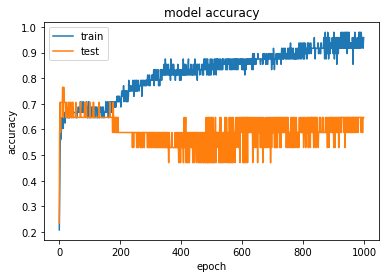

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on test set

In [14]:
model.evaluate(x=X_test, y=y_test_oneHot,batch_size=25, verbose=1)

17/17 [==============================] - 0s 59us/step


[1.894911766052246, 0.529411792755127]